# Data Science Project: Individual Planning Report

<u><b>Problem: Predicting Usage of a Video Game Research Server</u></b>

## (1) Data Description:
Here is the players.csv dataset:

Here is a summary of the players.csv dataset: 
| Variable | Type of variable | Number of observations | What does this variable mean |
|:-----------|:-----------------|:------------------------:|:---------------------------|
| `experience` | Character (chr) | 196 | Player’s experience level |
| `subscribe` | Logical (lgl) | 196 | Whether the player is subscribed or not |
| `hashedEmail` | Character (chr) | 196 | Player’s hashed email address 
| `played_hours` | Double (dbl) | 196 | Time spent in games by players
| `name` | Character (chr) | 196 | Name of players
| `gender` | Character (chr)| 196 | Gender of players
| `Age` | Double (dbl)| 194 | Age (in years) of player


| Statistics | `played_hours` | `Age` | 
|:-----------|:--------------:|:-----:|
| Mean | 5.85 | 20.52 |
| Minimum | 0 | 8 | 
| Maximum | 223.1 | 50 |


Issues in the dataset:
- There are two missing values in the `Age` column, meaning that performing statistics relevant to age might have a reduction in data points that can be used. Yet the large dataset compensates for it.
- The `gender` column consists of 7 distinct categories, meaning that there might be an underrepresentation of certain categories. 
- The timeframe of the data collected for the `played_hours` column is unknown, thus it is unclear whether it is over one continuous period or multiple periods 
- The extreme values will affect performance of statistics such as calculating the mean. 
## (2) Questions:
The broad question I would like to investigate is Question 1: what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types. From here, my specific question is **“can the time played and ages of players predict subscription status in the players.csv dataset?”**
<br>To address the specific question, I would use three variables in the player.csv dataset: `subscribe`, `Age` and `played_hours`. The explanatory variables are  `played_hours` and `Age` and they are double, whereas the predictor variable is `subscribe` and it is a character. To predict subscription status of players, we can use KNN classification to find the closest distance where the targeted point lies.  
## (3) Exploratory Data Analysis and Visualization:
To load the dataset into R, first load function libraries into R. 
<br>Then use the `read_csv` function. This is done by copying the raw link of players.csv file from GitHub and read the data.
<br>The following is the steps:

In [80]:
library(readr)
library(tidyr)
library(dplyr)
library(tidyverse)
library(tidymodels)

players <- read_csv("https://raw.githubusercontent.com/nicole-wun/dsci-project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Follow up from Question 2, some wrangling processes can be performed: 
1. Converts categorical variables (`experience`, `gender`,`subscribe`) into factors by using the `mutate` function. This allows these variables to be used in plotting and modelling. 
2. There are missing values in the `Age` column, so remove rows that contain NA value using `drop_na` function. 
3. Remove columns `hashedEmail` and `name` as they are unique and not useful for analysis or visualisation. If the sessions.csv dataset is used in analysis, `hashedEmail` column cannot be removed as it is used as an idetifier to the player. 

In [81]:
players_wrangling <- players |>
    mutate(experience = as.factor(experience), gender=as.factor(gender), subscribe=as.factor(subscribe))|>
    drop_na(Age) |>
    select(-hashedEmail, -name)
players_wrangling

experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


There are two quantitative variables in players.csv dataset: `played_hours` and `Age`. 
<br>Here is the mean value (in two decimal places) for each of the quantitative variable. 
| Statistic | `played_hours` | `Age` | 
|:-----------|:----------------:|:---------:|
| Mean | 5.90 | 20.52 |

This is how I obtain the values:

In [94]:
mean_time <- players_wrangling |> 
    summarize(mean_played_hours = mean(played_hours))
mean_time

mean_played_hours
<dbl>
5.904639


In [92]:
mean_age <- players_wrangling |>
    summarize(mean_Age=mean(Age))
mean_age

mean_Age
<dbl>
20.52062


For visulization of data, scatterplots, histograms and bar plots can be used.

`players_scatter_plot` seems to not have any correlation between age and time played. However, the subscription level seems to be higher for players who spend fewer hours in the game and at younger age.

`players_histogram_1` suggests that there are lots of players who spent zero hour in the game, whereas `players_histogram_2` shows that there are more playes in the 20-years-old cateogory from both graphs.

`players_bar_plot` shows that subscibers play more than non-subscribers and time spent by players seem to be more appropriate in predicitiion of the question.


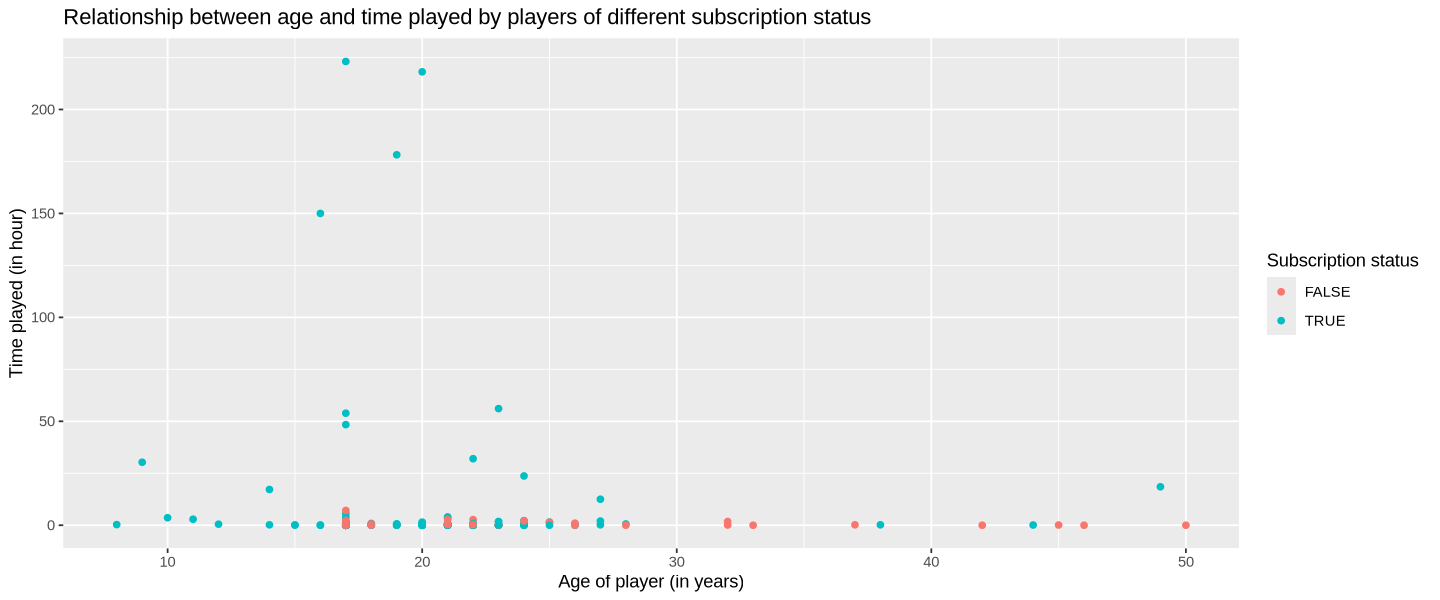

In [103]:
options(repr.plot.width = 12, repr.plot.height = 5) 
players_scatter_plot <- players_wrangling |>
    ggplot(aes(x=Age, y=played_hours, color=subscribe))+
    geom_point()+
    labs(x="Age of player (in years)", y="Time played (in hour)", color="Subscription status")+
    ggtitle("Relationship between age and time played by players of different subscription status")
players_scatter_plot

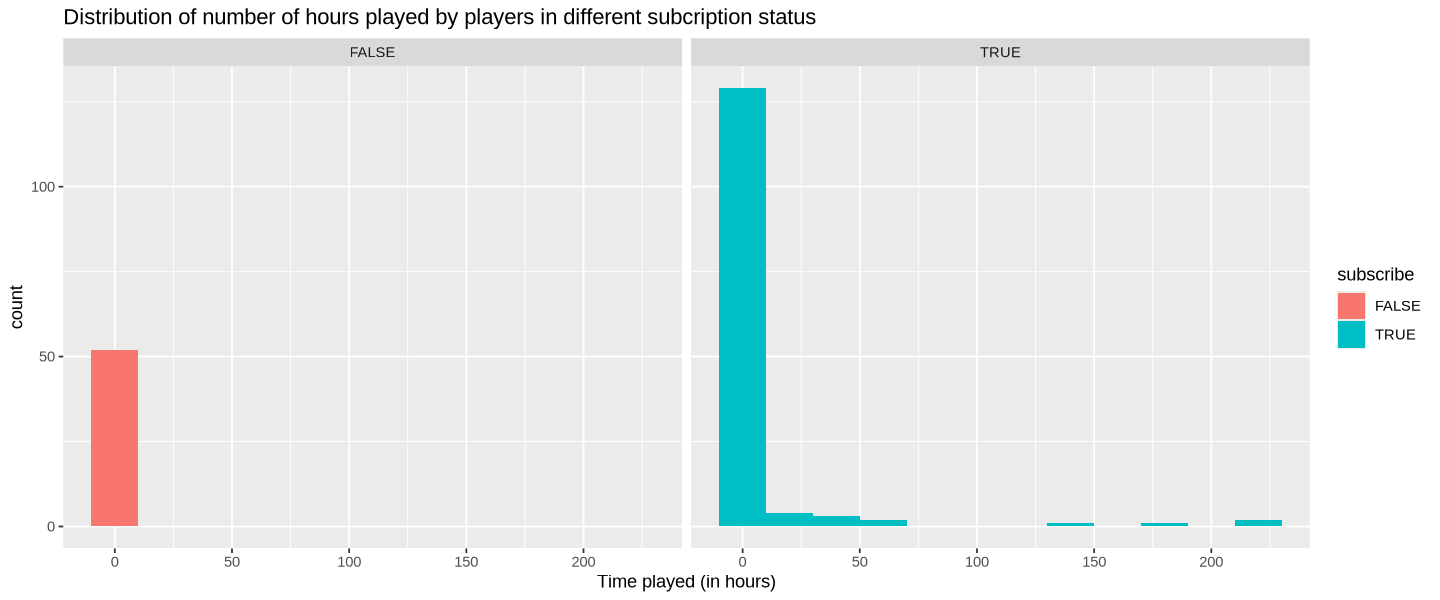

In [97]:
options(repr.plot.width = 12, repr.plot.height = 5) 
players_histogram_1 <- players_wrangling |>
    ggplot(aes(x=played_hours, fill=subscribe))+
    geom_histogram(binwidth=20)+
    labs(x="Time played (in hours)")+
    facet_grid(cols=vars(subscribe))+
    ggtitle("Distribution of number of hours played by players in different subcription status")
players_histogram_1

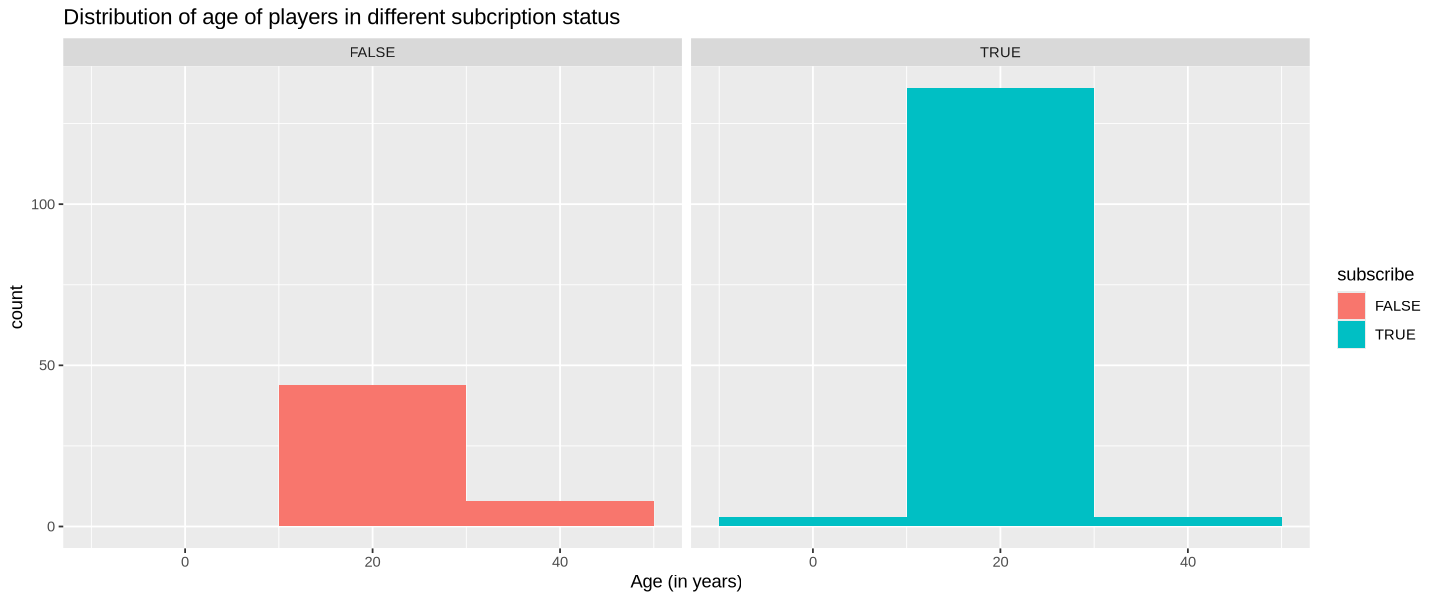

In [70]:
options(repr.plot.width = 12, repr.plot.height = 5) 
players_histogram_2 <- players_wrangling |>
    ggplot(aes(x=Age, fill=subscribe))+
    geom_histogram(binwidth=20)+
    labs(x="Age (in years)")+
    facet_grid(cols=vars(subscribe))+
    ggtitle("Distribution of age of players in different subcription status")
players_histogram_2

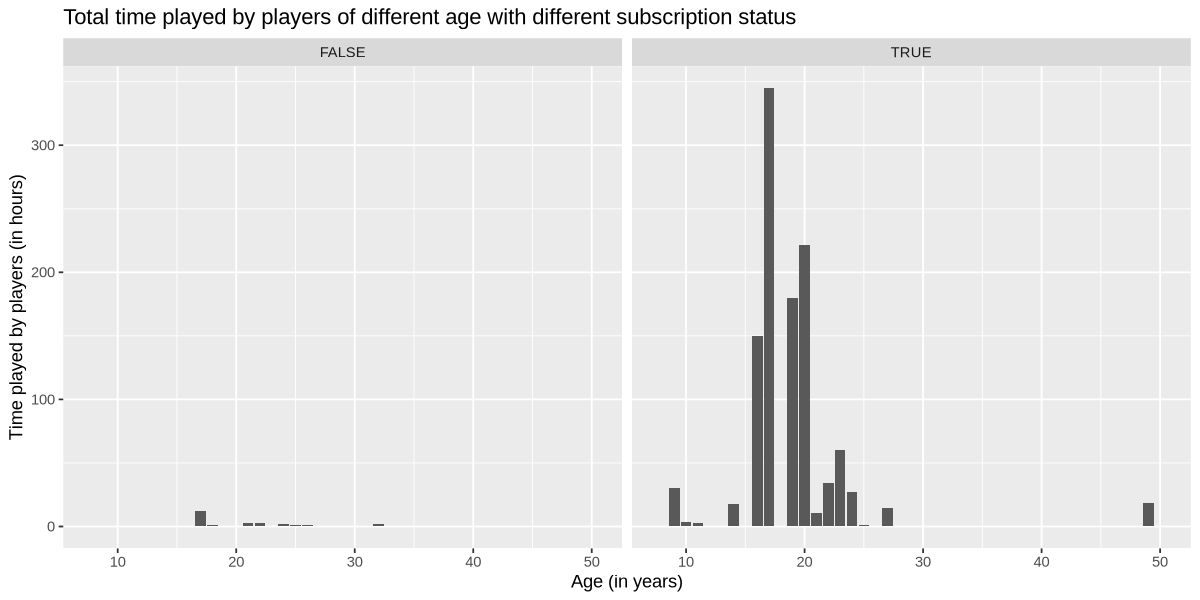

In [100]:
players_bar_plot <- players_wrangling |> 
  ggplot(aes(x = Age, y = played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Age (in years)", y = "Time played by players (in hours)") +
  ggtitle("Total time played by players of different age with different subscription status")+
  facet_grid(cols=vars(subscribe))
players_bar_plot

## (4) Methods and Plan:
To address my specific question, KNN classification can be used. KNN classification is an appropriate method because it can be used to predict a variable from numeric variables, in this case `age` and `played_hours`.
Some of the assumptions would be:
- Data points that appear close together are more likely to have the same predicted outcome
-

Limitations of the model include: 
- There are lots of zero values for `played_hours`, so there are fewer data points for larger values, thus prediction might not be as accurate for large values due to greater distance  
- Outliers or extreme values, such as  can mislead classification

In order to process the data to apply to model, these are the following actions:
1. Split data into training set (70%) and testing set (30%) before training the model 
2. Use a 5-fold cross-validation to select k value
3. Scale numerical variables to avoid bias in distance calculation